In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Data Exploration

In [2]:
train_path = "discordbot/data/discord_moderation_train_dataset.csv"
test_path = "discordbot/data/discord_moderation_test_dataset.csv"

# Clean up
df_train = pd.read_csv(train_path)
df_train = df_train.fillna("none")

df_test = pd.read_csv(test_path)
df_test = df_test.fillna("none")

In [3]:
df_train.head()

,message,abuse_type,fraud_subtype
0,"Hey everyone, this is @CodeMaster here. I just...",fraud,impersonation
1,@everyone I'm stuck on level 5 of the game! Ca...,spam,none
2,@everyone HELP! I need info on how to tune my ...,spam,none
3,"Hey guys, just found this sick website where y...",spam,none
4,Hey everyone! I'm trying to decide what to coo...,none,none


In [4]:
# Show examples
idx = 16
row = df_train.iloc[idx]
print("-"*50)
print(row["message"])
print("-"*50)
print(row["abuse_type"])
print(row["fraud_subtype"])

--------------------------------------------------
Guys, have you seen the latest meme about the new Marvel movie? It’s going viral and I can’t find it anywhere! Someone please link it if you’ve got it!
--------------------------------------------------
none
none


In [5]:
df = pd.read_csv("discordbot/data/confusion_data_optimized_2025-06-01_04-59-34.csv")
df = df.fillna("none")
df.head()

,message,actual_abuse_type,predicted_abuse_type,actual_fraud_subtype,predicted_fraud_subtype,predicted_severity,predicted_reason,predicted_confidence
0,Hey everyone! 🌟 I just started learning Python...,none,none,none,none,low,The message is a friendly request for help and...,0.95
1,Hey everyone! I'm trying to decide what to coo...,none,none,none,none,low,The message is a harmless request for suggesti...,0.95
2,"@ProjectNewbie Your code is so bad, I don't ev...",harassment,harassment,none,none,medium,The message is disrespectful and belittles ano...,0.85
3,"Hey everyone, I'm looking to upgrade my gaming...",none,none,none,none,low,The message is a legitimate inquiry for help r...,0.95
4,Hey everyone! Just got tickets to see The Chai...,none,none,none,none,low,The message is a positive expression about att...,0.95


# Confusion Matrix

In [6]:
def plot_confusion_matrices(csv_path):
    """
    Create a paired plot showing confusion matrices for abuse type and fraud subtype.
    For fraud subtypes, only includes examples where abuse type was correctly predicted as fraud.
    
    Args:
        csv_path (str): Path to the CSV file containing confusion data
    """
    # Read the CSV file
    df = pd.read_csv(csv_path)
    df = df.fillna("none")
    
    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
    
    # Get unique classes for abuse types and fraud subtypes
    abuse_classes = sorted(df['actual_abuse_type'].unique())
    
    # Create confusion matrices
    abuse_cm = confusion_matrix(df['actual_abuse_type'], df['predicted_abuse_type'], labels=abuse_classes)
    
    # For fraud subtypes, only include examples where abuse type was correctly predicted as fraud
    fraud_df = df[(df['actual_abuse_type'] == 'fraud') & (df['predicted_abuse_type'] == 'fraud')]
    fraud_classes = sorted(fraud_df['actual_fraud_subtype'].unique())
    fraud_cm = confusion_matrix(fraud_df['actual_fraud_subtype'], fraud_df['predicted_fraud_subtype'], labels=fraud_classes)

    
    # Calculate accuracies
    abuse_accuracy = np.sum(np.diag(abuse_cm)) / np.sum(abuse_cm)
    fraud_accuracy = np.sum(np.diag(fraud_cm)) / np.sum(fraud_cm)
    
    # Plot abuse type confusion matrix
    sns.heatmap(abuse_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=abuse_classes, yticklabels=abuse_classes, ax=ax1)
    ax1.set_xlabel('Predicted Abuse Type')
    ax1.set_ylabel('Actual Abuse Type')
    ax1.set_title(f'Abuse Type Confusion Matrix\nAccuracy: {abuse_accuracy:.2%}')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot fraud subtype confusion matrix
    sns.heatmap(fraud_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=fraud_classes, yticklabels=fraud_classes, ax=ax2)
    ax2.set_xlabel('Predicted Fraud Subtype')
    ax2.set_ylabel('Actual Fraud Subtype')
    ax2.set_title(f'Fraud Subtype Confusion Matrix\nAccuracy: {fraud_accuracy:.2%}\n(Only when abuse type is correctly predicted as fraud)')
    ax2.tick_params(axis='x', rotation=45)
    
    # Print accuracies
    print(f"Abuse Type Accuracy: {abuse_accuracy:.2%}")
    print(f"Fraud Subtype Accuracy: {fraud_accuracy:.2%} (only when abuse type is correctly predicted as fraud)")
    
    # Adjust layout
    plt.tight_layout()
    
    # Show plot
    plt.show()

In [7]:
# train set
base_path = "discordbot/data/confusion_data_base_2025-06-01_05-04-21.csv"
optimized_path = "discordbot/data/confusion_data_optimized_2025-06-01_04-59-34.csv"

# dev set
base_path = "discordbot/data/confusion_data_base_2025-06-01_16-03-27.csv"
optimized_path = "discordbot/data/confusion_data_optimized_2025-06-01_16-02-39.csv"

Abuse Type Accuracy: 75.37%
Fraud Subtype Accuracy: 78.43% (only when abuse type is correctly predicted as fraud)


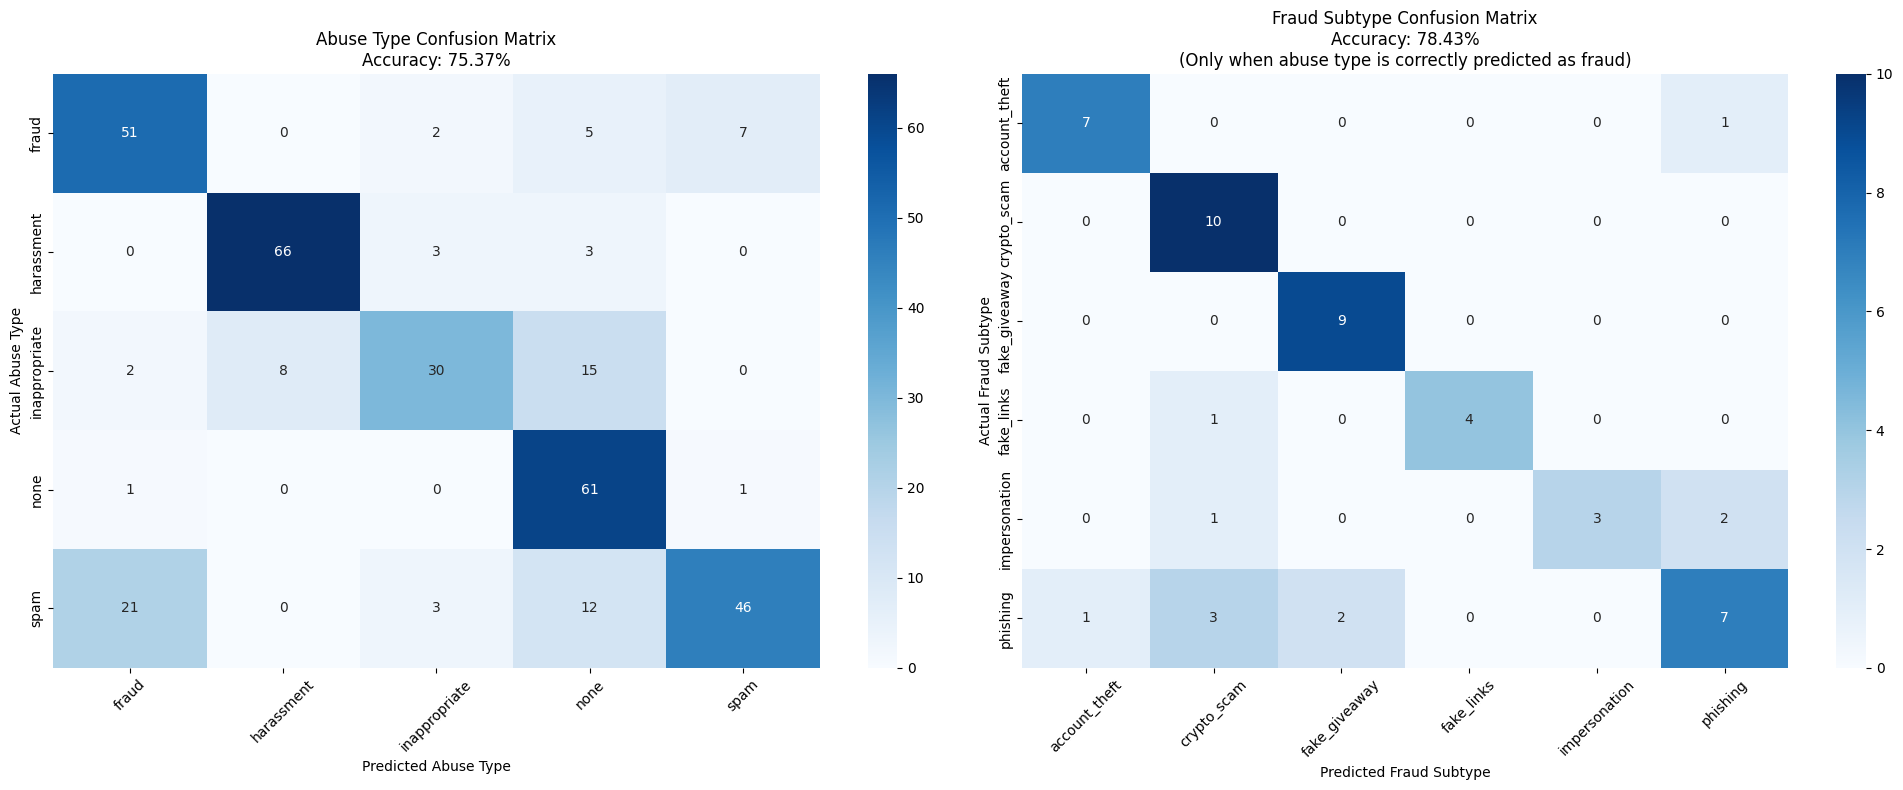

In [8]:
plot_confusion_matrices(optimized_path)

Abuse Type Accuracy: 65.88%
Fraud Subtype Accuracy: 72.55% (only when abuse type is correctly predicted as fraud)


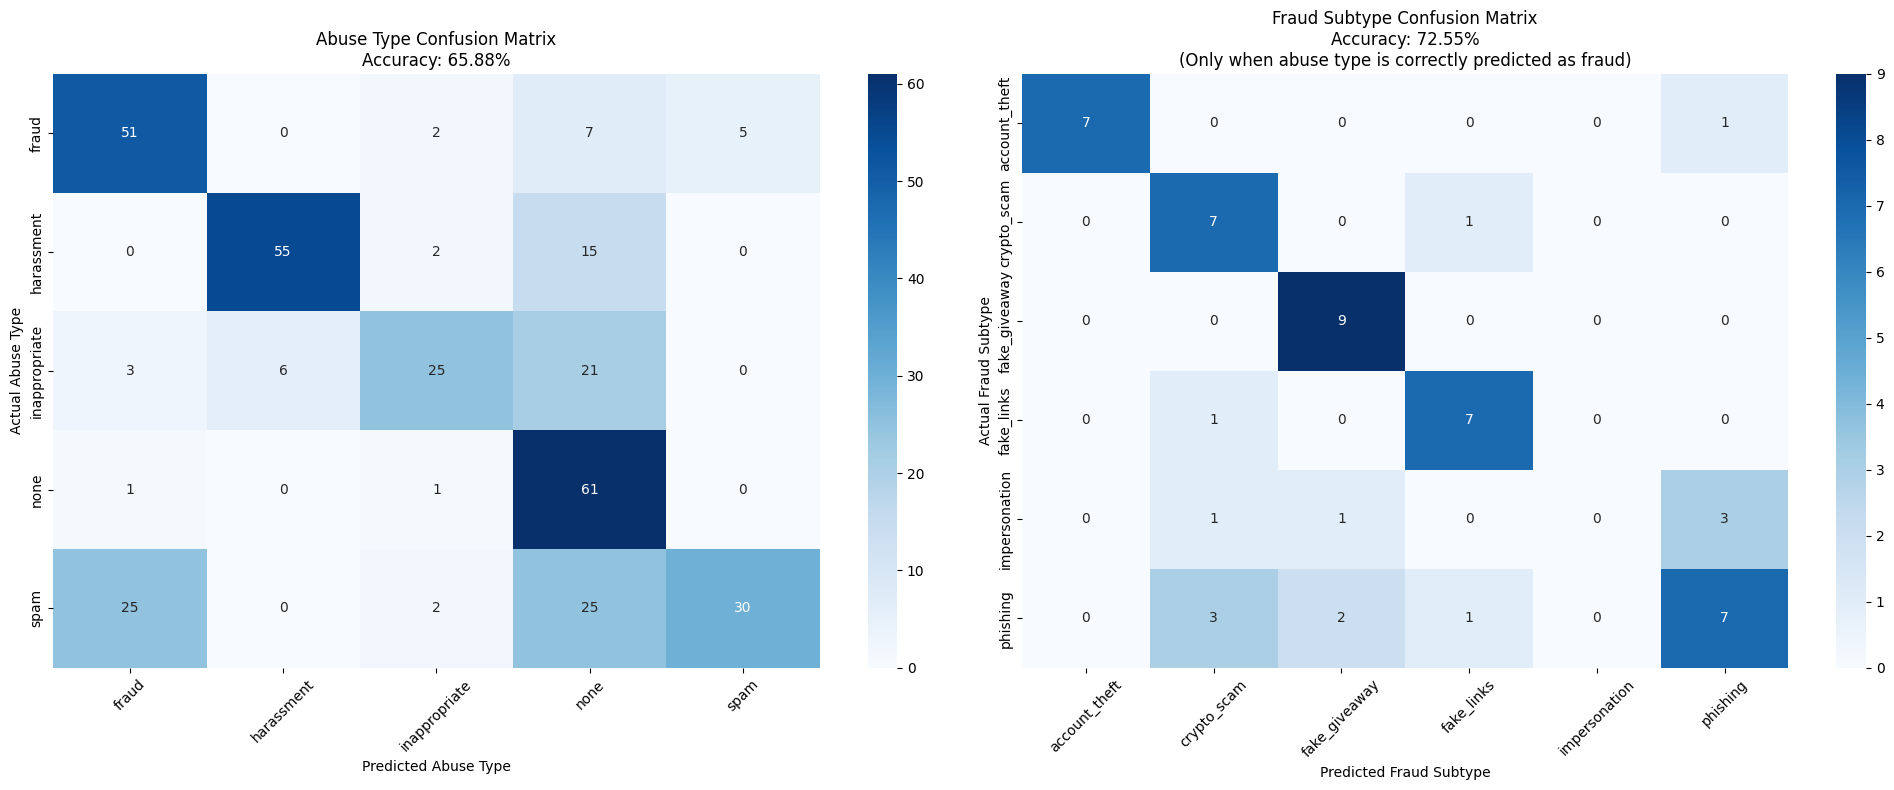

In [9]:
plot_confusion_matrices(base_path)

In [10]:
def print_abuse_type_misclassifications(df, n=3):
    # Get abuse type misclassifications
    abuse_misclass = df[df['actual_abuse_type'] != df['predicted_abuse_type']]
    print("\n=== Abuse Type Misclassifications ===")
    for _, row in abuse_misclass.head(n).iterrows():
        print(f"\nMessage: {row['message']}")
        print(f"Actual: {row['actual_abuse_type']}")
        print(f"Predicted: {row['predicted_abuse_type']}")
        print(f"Confidence: {row['predicted_confidence']:.2f}")
        
def print_fraud_subtype_misclassifications(df, n=3):
    # Get fraud subtype misclassifications
    fraud_misclass = df[(df['actual_abuse_type'] == 'fraud') & 
                       (df['predicted_abuse_type'] == 'fraud') &
                       (df['actual_fraud_subtype'] != df['predicted_fraud_subtype'])]
    
    print("\n=== Fraud Subtype Misclassifications ===")
    for _, row in fraud_misclass.head(n).iterrows():
        print(f"\nMessage: {row['message']}")
        print(f"Actual: {row['actual_fraud_subtype']}")
        print(f"Predicted: {row['predicted_fraud_subtype']}")
        print(f"Confidence: {row['predicted_confidence']:.2f}")

In [11]:
# Load and analyze both datasets
print("=== Optimized Model Misclassifications ===")
optimized_df = pd.read_csv(optimized_path)
optimized_df = optimized_df.fillna("none")
print_abuse_type_misclassifications(optimized_df)

=== Optimized Model Misclassifications ===

=== Abuse Type Misclassifications ===

Message: Hello everyone,

We have received several reports that some of you may be experiencing issues with your devices. Our certified tech support team is available 24/7 to assist you with any setup or troubleshooting needs. Please visit our official support site at [support-tech.com](http://support-tech.com) to schedule a free consultation.

Thank you for choosing us for your tech support needs!

Best regards,
Tech Support Team
Actual: spam
Predicted: fraud
Confidence: 0.85

Message: Hey everyone, I'm trying to set up my new PC and I keep getting locked out of my accounts. Could someone help me understand how to securely save my passwords? I've heard some people recommend using the same password across multiple sites for simplicity, but is that safe? Also, where can I find a good tutorial on setting up two-factor authentication?
Actual: fraud
Predicted: none
Confidence: 0.95

Message: Hello everyone,


In [12]:
print_fraud_subtype_misclassifications(optimized_df)


=== Fraud Subtype Misclassifications ===

Message: Hey there! I noticed you're having trouble with your software. I'm actually from the tech support team and can help you out. First, you'll need to download our diagnostic tool from the link below. This will allow us to identify any issues and fix them for you. Make sure to run it as an administrator to ensure everything works smoothly. Here's the link: [Malicious Link]. Let me know if you need further assistance!
Actual: impersonation
Predicted: phishing
Confidence: 0.95

Message: Hey everyone! I found this awesome new platform for crypto enthusiasts where we can dive deep into technical discussions and share insights. Check it out and let me know what you think! 🚀 [Join the Crypto Hub](http://fakecryptohub.com)
Actual: phishing
Predicted: crypto_scam
Confidence: 0.85

Message: Hey there! I saw you're looking for some career advice. I've been where you are and I can definitely help you out. To give you the best guidance, could you sha

In [13]:
print("\n=== Base Model Misclassifications ===")
base_df = pd.read_csv(base_path)
base_df = base_df.fillna("none")


=== Base Model Misclassifications ===


In [14]:
print_abuse_type_misclassifications(base_df)


=== Abuse Type Misclassifications ===

Message: "Hey, I've been having some weird issues with my GPU. It's overheating and sometimes it just shuts down. I think I might need to take a look at the cooling system, but I'm not sure where to start. Could someone help me out? And maybe we could chat more privately about this... you know, one-on-one?"
Actual: inappropriate
Predicted: none
Confidence: 0.95

Message: 🎉 Hey everyone! 🚀 Just had the best experience with our new tech setup guide! It’s so easy and they even have live support! Check it out here: [fake-link.com] and get your tech working like never before! 🔧💻 #TechRevolution 💥
Actual: spam
Predicted: fraud
Confidence: 0.85

Message: Hey everyone, I'm trying to set up my new PC and I keep getting locked out of my accounts. Could someone help me understand how to securely save my passwords? I've heard some people recommend using the same password across multiple sites for simplicity, but is that safe? Also, where can I find a good tu

In [15]:
print_fraud_subtype_misclassifications(base_df)


=== Fraud Subtype Misclassifications ===

Message: Hey there! I noticed you're having trouble with your software. I'm actually from the tech support team and can help you out. First, you'll need to download our diagnostic tool from the link below. This will allow us to identify any issues and fix them for you. Make sure to run it as an administrator to ensure everything works smoothly. Here's the link: [Malicious Link]. Let me know if you need further assistance!
Actual: impersonation
Predicted: phishing
Confidence: 0.95

Message: Hey everyone! I found this awesome new platform for crypto enthusiasts where we can dive deep into technical discussions and share insights. Check it out and let me know what you think! 🚀 [Join the Crypto Hub](http://fakecryptohub.com)
Actual: phishing
Predicted: crypto_scam
Confidence: 0.85

Message: Hey everyone! Just found this cool new crypto exchange that offers some really great deals on tokens. I've been using it for a few trades and it seems legit. C